In [ ]:
# Import necessary libraries
import pandas as pd
import re
import numpy as np
import nltk
import seaborn as sns

from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

**Data Import and Conversion**

In [ ]:
# Read text file
with open('train.txt') as f:
    content = f.read()

In [ ]:
# Handle data formating 
content = content.replace("\n\n", "\n\t\n")
content_all = content.split("\n\t\n")

while("" in content_all):
    content_all.remove("")

while("\n" in content_all):
    content_all.remove("\n")

In [ ]:
# Data conversion
content_df = pd.DataFrame()
for i in range(len(content_all)):
    split_sent = content_all[i].split("\n")
    tokens=[]
    ner_tags=[]
    ner_elements=[]
    for j in range(len(split_sent)):
        split_word = split_sent[j].split("\t")
        tokens.append(split_word[0])
        ner_tags.append(split_word[1])
        sentence = " ".join(tokens)
        if split_word[1] != "O":
          ner_elements.append(split_word[0])
    content_df.loc[i,"doc_id"] = i
    content_df.loc[i,"sentence"] = sentence
    content_df.loc[i, "tokens"] = str(tokens)
    content_df.loc[i,"ner_tags"] = " ".join(ner_tags)
    content_df.loc[i,"ner_elements"] = " ".join(ner_elements)

In [ ]:
# Print samples
print(content_df.head())

   doc_id                                           sentence  \
0     0.0  @paulwalk It 's the view from where I 'm livin...   
1     1.0  From Green Newsfeed : AHFA extends deadline fo...   
2     2.0  Pxleyes Top 50 Photography Contest Pictures of...   
3     3.0               today is my last day at the office .   
4     4.0  4Dbling 's place til monday , party party part...   

                                              tokens  \
0  ['@paulwalk', 'It', "'s", 'the', 'view', 'from...   
1  ['From', 'Green', 'Newsfeed', ':', 'AHFA', 'ex...   
2  ['Pxleyes', 'Top', '50', 'Photography', 'Conte...   
3  ['today', 'is', 'my', 'last', 'day', 'at', 'th...   
4  ['4Dbling', "'s", 'place', 'til', 'monday', ',...   

                                            ner_tags  \
0  O O O O O O O O O O O O O O B-location I-locat...   
1                O O O O B-group O O O O O O O O O O   
2                B-corporation O O O O O O O O O O O   
3                                  O O O O O O O O O  

# **Analyzing Text Statistics**

---
Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).


**Histogram and Bar Charts**

---
The histogram shows that sentences range from 5 to 155 characters and generally, it is between 25 to 50 characters.

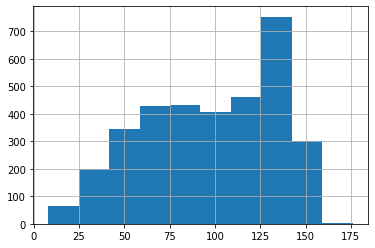

In [ ]:
# Histogram and Bar Chart
content_df['sentence'].str.len().hist()

**Average Word Length**

---
let’s check the average word length in each sentence.

The average word length ranges between 3 to 7 with 5 being the most common length. 

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. 

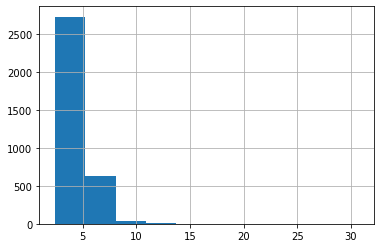

In [ ]:
content_df['sentence'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# **Most Influenced Words**

---
Find the most dominated words in the corpus

In [ ]:
# NLTK
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create the corpus
corpus=[]
content_df["sentence"] = content_df["sentence"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
content_df["sentence"] = content_df["sentence"].str.replace('[^\w\s]','')
new= content_df['sentence'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<ipython-input-9-34ae3cd04e61>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  content_df["sentence"] = content_df["sentence"].str.replace('[^\w\s]','')


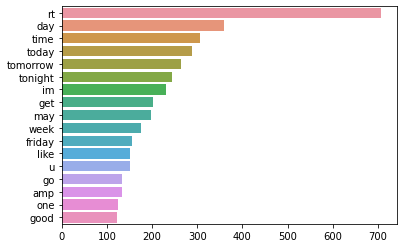

In [ ]:
# Create a Bar Plot
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

# **Most Influential Entities**

---
Find the most influenced entities in the corpus

In [ ]:
# Create the corpus for Entity Elements
corpus=[]
content_df["ner_elements"] = content_df["ner_elements"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
content_df["ner_elements"] = content_df["ner_elements"].str.replace('[^\w\s]','')
new= content_df['ner_elements'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<ipython-input-11-1d028cf15673>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  content_df["ner_elements"] = content_df["ner_elements"].str.replace('[^\w\s]','')


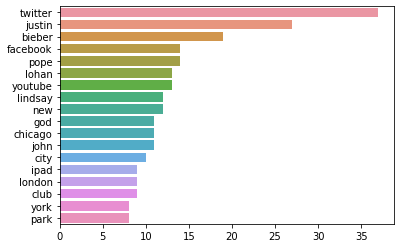

In [ ]:
# Create a Bar Plot for dominent Entities
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

From the above plot we can see the corpus inflences more about the **Social Networks, Twitter, Facebook, Youtube**

# **Most Dominent Entity Label**

---
Find the most influenced entitie labels in the corpus

In [ ]:
# Create the corpus for Entity Elements
corpus=[]
content_df["ner_tags"] = content_df["ner_tags"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
content_df["ner_tags"] = content_df["ner_tags"].str.replace('[^\w\s]','')
new= content_df['ner_tags'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<ipython-input-13-88250c63cbe6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  content_df["ner_tags"] = content_df["ner_tags"].str.replace('[^\w\s]','')


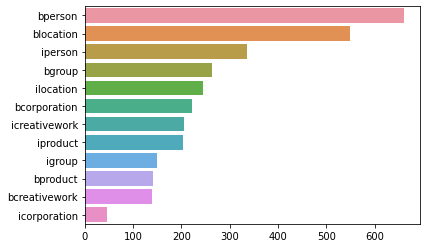

In [ ]:
# Create a Bar Plot for dominent Entities
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

From the above plot we can see the corpus inflences more about the entity labels **B-Person, B-Location, I-Person**

# **Ngram Exploration**

---
Ngrams are simply contiguous sequences of n words. Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [ ]:
# Code Snippet for Top N-grams Barchart
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

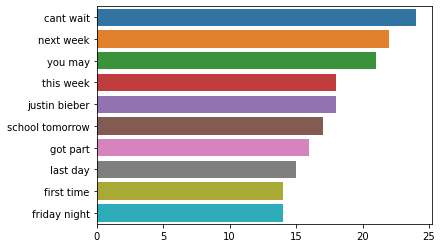

In [ ]:
# Bigram Plot
plot_top_ngrams_barchart(content_df['sentence'],2)

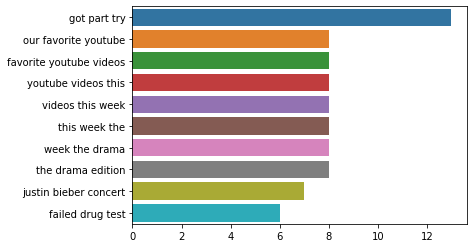

In [ ]:
# Trigram Plot
plot_top_ngrams_barchart(content_df['sentence'],3)

# **Outlier Analysis**

---
From the above Text Analytic Statistics. It seems good with the words.
Let us check the relativity between the Special Characters and Entities

In [ ]:
# collect the entities have Special Characters
outliers = pd.DataFrame()
doc_obj = []
for i in range(len(content_all)):
    split_sent = content_all[i].split("\n")
    tokens=[]
    ner_tags=[]
    ner_elements=[]
    for j in range(len(split_sent)):
        split_word = split_sent[j].split("\t")
        if split_word[1] != "O":
            ner_elements.append(split_word[0])
            ner_tags.append(split_word[1])
        tokens.append(split_word[0])
    sentence = (" ".join(tokens))
    if(len(ner_tags) > 0):
        ner_tags_list=[]
        for k in range(len(ner_tags)):
            if (bool(re.match('^[a-zA-Z@#]*$',ner_elements[k]))!=True):
                outliers.loc[i,"doc_id"] = i
                outliers.loc[i,"doc"] = sentence
                outliers.loc[i, "tokens"] = ner_elements[k]
                outliers.loc[i,"ner_tags"] = ner_tags[k]

In [ ]:
# Print samples
print(outliers.head())

     doc_id                                                doc         tokens  \
4       4.0  4Dbling 's place til monday , party party part...        4Dbling   
38     38.0  Really hope I can get to @glasgowfilm for Wint...             's   
44     44.0  What Do S.F. Rabbis Eat Before and After Yom K...           S.F.   
59     59.0  Yo kids ! Today 's ACF Friday Large Group is a...            G24   
113   113.0  RT @ravenalexis Wanna meet me , @jessejane , @...  @kayden_kross   

            ner_tags  
4           B-person  
38   I-creative-work  
44        B-location  
59        I-location  
113         B-person  


In [ ]:
outliers.to_excel("outliers.xlsx")

From the above dataframe I am not saying that all the documents are outlier. 

---

But look for some of the below documents

# **Mismatch in Name Taggings**

---

***Doc_id: 113***

RT @ravenalexis Wanna meet me , @jessejane , @rileysteele , and @kayden_kross ? Come to the Body Heat signing at Hustler Hollywood Sep 23rd 8-10pm

***Doc_id: 1***

@paulwalk It 's the view from where I 'm living for two weeks . Empire State Building = ESB . Pretty bad storm here last evening .


***Uncommon Behaviour***: Here @ravenalexis, "@jessejane , @rileysteele , and @kayden_kross" is tagged as B-Person. But some of the douments are not tagged in the same way. 

look at doc_id:1 and doc_id:113

"@paulwalk" is tagged as "O"

"@jessejane , @rileysteele , and @kayden_kross" are tagged as B-Person

---

## **Special Characters + Entities Overlapping**

***Doc_id: 1746***

I'm at Bowl Long Island ( 138 West Ave , Patchogue) . http://4sq.com/aX6N26


***Need Standard Format***: Here "Patchogue)" is combined and tagged as B-Location. 

Expectation should be

"Patchogue" is B-Location and 

")" is B-Location"

---


***Doc_id: 1759***

Free Romeo &amp; Julliet under the stars tonight thru Sunday in South Park- please retweet please come ! http://is.gd/ff482


***Need Standard Format***: Here "Park-" is combined and tagged as B-Location.